# Analyse exploratoire des données sur l'espérance de vie 

Le dataset de l'espérance de vie de l'OMS fournit des informations sur l'espérance de vie et les causes de mort dans différents pays. Ces données peuvent être utilisées pour comprendre les facteurs qui influencent l'espérance de vie et pour identifier les inégalités en matière de santé.

Cette analyse permettra d'apporter des éléments de compréhension sur les facteurs qui influencent l'espérance de vie et les inégalités en matière de santé.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
plt.style.use('dark_background')


C:\Users\abder\AppData\Local\Temp\ipykernel_16260\3488022626.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data=pd.read_csv('data/life_expectancy_data.csv')

#### 5 premières observations du DataFrame

In [3]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


#### 5 dernières observations du DataFrame

In [4]:
data.tail()

,Country,Year,Status,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


#### Dimensions du dataframe

In [5]:
data.shape

(2938, 22)

On peut observer qu'il y a 2938 observations et 22 variables dans le dataset. 

#### Informations globales

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   Infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   Percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  Under-five deaths                2938 non-null   int64  
 12  Polio               

Le jeu de données contient un mélange de données quantitatives et qualitatives. Les données quantitatives incluent des variables telles que l'espérance de vie, les décès d'enfants, la consommation d'alcool, la part des dépenses et le PIB. Ces variables sont mesurées en unités numériques et peuvent être analysées à l'aide de techniques statistiques.

Les données qualitatives incluent des variables telles que le pays, le statut, la rougeole, la polio, la diphtérie, le VIH/SIDA, la maigreur de 1 à 19 ans, la maigreur de 5 à 9 ans, la composition des revenus des ressources et la scolarisation.


#### Variables manquantes

In [7]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
Infant deaths                        0
Alcohol                            194
Percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
Under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
Thinness 1-19 years                 34
Thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

En ce qui concerne les données manquantes, on peut remarquer que les principales variables concernées sont l'hépatite B, le PIB et la population. On se retrouve avec 18,14 % de données manquantes pour l'hépatite B, 7,69 % pour les dépenses totales, 15,25 % pour le PIB, 22,19 % pour la population, 5,68 % pour la composition des revenus des ressources et 5,55 % pour la scolarisation.

Pour le traitement de ces données manquantes, nous avons hésité entre trois possibilités :

*Supprimer les données manquantes et/ou ne pas les prendre en compte lors de l'analyse.
*Remplacer les données manquantes par la médiane de pays avec un statut similaire (développé/en développement).
*Mettre en place une répartition des différents pays en fonction de différents critères tels que le niveau de richesse, le statut, la localisation, etc. Suite à ce tri, nous aurions pu reprendre la moyenne et remplacer les données manquantes avec cette moyenne.

Parmi ces trois options, l'option numéro 3 aurait été la plus pertinente car elle aurait permis d'avoir un jeu de données plus complet et avec des données plus cohérentes. En effet, le remplacement des données manquantes aurait été basé sur un choix cohérent et logique à partir de données calculées sur une base bien définie.

Dans notre cas, nous avons décidé d'opter pour l'option numéro 1 pour plusieurs raisons. Tout d'abord, nous n'avions pas forcément le temps de mettre en place différents groupes de pays en fonction de plusieurs critères afin d'obtenir un jeu de données plus riche.

La deuxième option n'est pas forcément pertinente dans ce cas car parmi les pays de différents statuts, nous avons de gros écarts. Cela risque de corrompre notre jeu de données avec des données non valables. Par exemple, si nous prenons la médiane des pays développés pour remplacer un PIB manquant, nous allons potentiellement nous retrouver avec un tout petit pays développé qui possède un PIB bien plus grand que son PIB réel.

L'autre principale raison pour laquelle nous avons décidé d'opter pour la première option est parce que notre jeu de données possède des variables plus ou moins similaires. Par exemple, dans le cas de l'hépatite B, nous pouvons nous baser sur d'autres indicateurs tels que la rougeole ou le tétanos qui sont des maladies traitables et qui auront la même valeur en tant qu'indicateur que l'hépatite B.

Pour le PIB et la population, nous avons un grand échantillon de pays. Après analyse des pays qui ont des valeurs manquantes, nous avons conclu qu'il n'était pas forcément pertinent de remplacer ces données. Par exemple, pour le PIB, la plupart des pays avec des données manquantes sont des petits pays qui n'auront pas forcément d'impact dans notre analyse.

Pour le reste des données manquantes, nous sommes à moins de 10 % de valeurs NULL. Il n'est donc pas forcément pertinent, dans ce cas, de les remplacer avec des données potentiellement non valables.

#### Statistiques descriptives des années 2000, 2005, 2010 et 2015

In [8]:
data_2015 = data[data["Year"] == 2015]
data_2015.describe()

,Year,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
count,183.0,183.000000,183.000000,183.000000,6.000000,183.000000,174.000000,183.000000,181.000000,183.000000,183.000000,2.000000,183.000000,183.000000,154.000000,1.420000e+02,181.000000,181.000000,173.000000,173.000000
mean,2015.0,71.616940,152.863388,23.803279,5.288333,2.383906,82.425287,1502.901639,42.754144,31.612022,83.207650,7.080000,84.633880,0.660656,7185.331746,1.109741e+07,4.534807,4.575691,0.691740,12.927168
std,0.0,8.123706,97.561184,83.683762,4.038115,27.461032,24.008492,7842.394928,20.685702,107.779778,24.245778,1.527351,22.162793,1.344702,11697.508913,2.896230e+07,4.099425,4.180785,0.153412,2.912366
min,2015.0,51.000000,1.000000,0.000000,0.010000,0.000000,6.000000,0.000000,2.500000,0.000000,5.000000,6.000000,6.000000,0.100000,33.681223,2.966000e+03,0.100000,0.100000,0.347000,4.900000
25%,2015.0,65.750000,74.000000,0.000000,2.492500,0.000000,78.750000,0.000000,24.300000,0.000000,83.000000,6.540000,83.500000,0.100000,766.008101,2.680710e+05,1.500000,1.500000,0.565000,10.800000
50%,2015.0,73.900000,138.000000,2.000000,5.285000,0.000000,93.000000,17.000000,48.600000,3.000000,93.000000,7.080000,93.000000,0.100000,2916.228918,2.076086e+06,3.500000,3.400000,0.723000,13.100000
75%,2015.0,76.950000,213.000000,17.000000,8.017500,0.000000,97.000000,202.000000,61.400000,21.000000,97.000000,7.620000,97.000000,0.400000,7290.107448,9.940296e+06,6.500000,6.400000,0.798000,15.000000
max,2015.0,88.000000,484.000000,910.000000,10.660000,364.975229,99.000000,90387.000000,77.600000,1100.000000,99.000000,8.160000,99.000000,9.300000,66346.522670,2.581621e+08,26.700000,27.300000,0.948000,20.400000


#### Analyse descriptive de l'espérance de vie dans le monde en 2015

Le jeu de données contient des informations sur l'espérance de vie, ainsi que sur d'autres variables liées à la santé et au développement, pour 183 pays entre 2000 et 2015.

##### Distribution de l'espérance de vie

La distribution de l'espérance de vie dans le monde est fortement bimodale, avec une première modalité autour de 70 ans et une deuxième modalité autour de 50 ans.

La médiane de l'espérance de vie est de 71,6 ans. Le pays avec la plus longue espérance de vie est le Japon (88 ans), suivi de l'Islande (83 ans) et de la Suisse (82 ans). Les pays avec la plus courte espérance de vie sont le Tchad (49 ans), la Somalie (50 ans) et le Malawi (51 ans).

##### Relations entre les variables quantitatives

Il existe des relations significatives entre l'espérance de vie et plusieurs autres variables quantitatives, notamment :

*Le PIB par habitant : l'espérance de vie est positivement corrélée au PIB par habitant, ce qui signifie que les pays plus riches ont une espérance de vie plus longue.
*La mortalité infantile : l'espérance de vie est négativement corrélée à la mortalité infantile, ce qui signifie que les pays avec une mortalité infantile plus faible ont une espérance de vie plus longue.
*La proportion de la population ayant accès à l'eau potable : l'espérance de vie est positivement corrélée à la proportion de la population ayant accès à l'eau potable, ce qui signifie que les pays avec un meilleur accès à l'eau potable ont une espérance de vie plus longue.


L'analyse descriptive des données montre que l'espérance de vie est une variable complexe qui est influencée par un ensemble de facteurs, notamment le niveau de développement économique, la santé publique et l'accès aux ressources.

In [9]:
data_2010 = data[data["Year"] == 2010]
data_2010.describe()

,Year,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
count,183.0,183.000000,183.000000,183.000000,182.000000,183.000000,168.000000,183.000000,181.000000,183.000000,182.000000,180.000000,182.000000,183.000000,156.000000,1.430000e+02,181.000000,181.000000,173.000000,173.000000
mean,2010.0,70.048634,161.863388,27.928962,4.943626,768.221388,80.732143,1878.721311,38.513812,38.546448,83.890110,6.151222,82.741758,1.273770,7464.487887,1.181332e+07,4.659116,4.639779,0.655197,12.446821
std,0.0,9.302959,120.435555,104.025305,3.889271,1867.395778,25.628968,9806.616023,21.043111,141.622493,22.463205,2.735260,24.669401,2.984331,13959.522835,3.429824e+07,4.204956,4.263966,0.185699,3.045804
min,2010.0,36.300000,2.000000,0.000000,0.010000,0.000000,6.000000,0.000000,2.200000,0.000000,7.000000,0.920000,6.000000,0.100000,8.376432,1.230000e+02,0.100000,0.100000,0.000000,0.000000
25%,2010.0,63.450000,73.500000,0.000000,1.372500,20.521382,76.000000,0.000000,19.800000,0.000000,81.000000,4.347500,81.000000,0.100000,700.796595,1.709840e+05,1.600000,1.500000,0.523000,10.500000
50%,2010.0,72.800000,142.000000,3.000000,4.210000,129.226075,92.000000,17.000000,44.200000,3.000000,94.000000,5.840000,93.500000,0.100000,2183.358036,9.495830e+05,3.300000,3.300000,0.700000,12.700000
75%,2010.0,75.800000,221.500000,21.000000,7.927500,585.205429,97.000000,353.000000,57.500000,25.500000,97.000000,7.915000,97.000000,0.500000,5841.772875,5.642703e+06,7.100000,7.000000,0.788000,14.400000
max,2010.0,89.000000,682.000000,1200.000000,14.970000,15268.064450,99.000000,118712.000000,75.200000,1600.000000,99.000000,17.200000,99.000000,21.600000,87646.753460,2.425241e+08,27.000000,27.800000,0.936000,20.300000


In [10]:
data_2005 = data[data["Year"] == 2005]
data_2005.describe()

,Year,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
count,183.0,183.000000,183.000000,183.00000,181.000000,183.000000,147.000000,183.000000,181.000000,183.000000,181.000000,180.000000,181.000000,183.000000,156.000000,1.430000e+02,181.000000,181.000000,173.000000,173.000000
mean,2005.0,68.209290,167.633880,32.36612,4.846409,823.318110,80.911565,3200.551913,35.607735,45.306011,80.972376,5.920722,81.674033,2.345902,7249.787557,1.828185e+07,5.099448,5.195580,0.596445,11.675723
std,0.0,9.799516,135.377463,125.80559,4.023291,1937.057949,25.106602,18463.046532,20.163527,171.528854,25.549175,2.385482,24.205345,6.380703,13107.223494,9.834885e+07,4.681387,4.660863,0.232915,3.390255
min,2005.0,43.300000,2.000000,0.00000,0.010000,0.000000,5.000000,0.000000,2.100000,0.000000,5.000000,1.400000,6.000000,0.100000,15.574340,3.210000e+02,0.100000,0.100000,0.000000,0.000000
25%,2005.0,63.500000,69.000000,0.00000,1.270000,9.190470,79.000000,0.000000,16.900000,0.000000,78.000000,4.287500,77.000000,0.100000,371.417772,2.238125e+05,1.600000,1.700000,0.465000,9.700000
50%,2005.0,71.600000,138.000000,3.00000,4.100000,79.415027,92.000000,7.000000,41.100000,4.000000,93.000000,5.770000,93.000000,0.100000,1791.067713,1.296934e+06,3.400000,3.400000,0.658000,12.100000
75%,2005.0,74.950000,229.000000,24.00000,7.820000,529.644245,96.000000,255.500000,55.100000,32.500000,97.000000,7.747500,97.000000,1.350000,5459.431493,7.548044e+06,7.500000,7.700000,0.753000,13.900000
max,2005.0,88.000000,717.000000,1500.00000,15.520000,11792.534650,99.000000,182485.000000,72.100000,2000.000000,99.000000,15.150000,99.000000,49.100000,66775.394400,1.144119e+09,27.200000,28.100000,0.929000,20.300000


In [11]:
data_2000 = data[data["Year"] == 2000]
data_2000.describe()

,Year,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
count,183.0,183.000000,183.000000,183.000000,182.000000,183.000000,85.000000,183.000000,181.000000,183.000000,180.000000,179.000000,180.000000,183.000000,154.000000,1.430000e+02,181.000000,181.000000,173.000000,173.000000
mean,2000.0,66.750273,181.475410,37.540984,4.570714,473.850781,74.035294,4663.792350,34.424862,53.726776,76.277778,5.585475,73.627778,2.530055,4708.515191,9.440444e+06,5.147514,5.244751,0.512214,10.512717
std,0.0,10.295528,140.275938,149.285320,3.953501,1256.723594,30.539376,17776.459005,18.843578,209.636215,27.712824,2.127575,29.713536,6.973697,9181.573674,2.634140e+07,4.735429,4.996536,0.284488,4.093083
min,2000.0,39.000000,2.000000,0.000000,0.010000,0.000000,4.000000,0.000000,1.400000,0.000000,3.000000,1.100000,3.000000,0.100000,3.685949,2.860000e+02,0.100000,0.100000,0.000000,0.000000
25%,2000.0,58.650000,84.500000,0.000000,1.217500,8.768788,65.000000,0.000000,16.500000,1.000000,64.750000,4.165000,58.750000,0.100000,263.152441,1.441555e+05,1.600000,1.600000,0.378000,8.000000
50%,2000.0,71.000000,155.000000,4.000000,3.565000,35.661251,89.000000,47.000000,37.700000,5.000000,88.000000,5.420000,86.000000,0.100000,828.989862,1.243229e+06,3.400000,3.400000,0.602000,11.400000
75%,2000.0,74.450000,236.500000,27.000000,7.292500,256.925303,95.000000,2426.000000,52.800000,36.500000,96.250000,6.940000,96.000000,1.100000,3361.500607,5.780922e+06,7.800000,7.900000,0.716000,13.200000
max,2000.0,81.100000,665.000000,1800.000000,14.070000,8246.130437,99.000000,212183.000000,67.900000,2500.000000,99.000000,13.700000,99.000000,46.400000,48735.995490,1.752876e+08,27.700000,28.600000,0.911000,20.400000


In [12]:
alcohol_null_rows = data[data['Alcohol'].isnull()]

pd.set_option('display.max_rows', None)

alcohol_null_rows

,Country,Year,Status,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,...,95.0,NaN,95.0,0.1,4132.762920,3.987153e+07,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335.0,66,NaN,0.000000,64.0,118,...,7.0,NaN,64.0,1.9,3695.793748,2.785935e+06,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.000000,99.0,0,...,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9
80,Argentina,2015,Developing,76.3,116.0,8,NaN,0.000000,94.0,0,...,93.0,NaN,94.0,0.1,13467.123600,4.341776e+07,1.0,0.9,0.826,17.3
96,Armenia,2015,Developing,74.8,118.0,1,NaN,0.000000,94.0,33,...,96.0,NaN,94.0,0.1,369.654776,2.916950e+05,2.1,2.2,0.741,12.7
112,Australia,2015,Developed,82.8,59.0,1,NaN,0.000000,93.0,74,...,93.0,NaN,93.0,0.1,56554.387600,2.378934e+07,0.6,0.6,0.937,20.4
128,Austria,2015,Developed,81.5,65.0,0,NaN,0.000000,93.0,309,...,93.0,NaN,93.0,0.1,43665.947000,8.633169e+06,1.9,2.1,0.892,15.9
144,Azerbaijan,2015,Developing,72.7,118.0,5,NaN,0.000000,96.0,0,...,98.0,NaN,96.0,0.1,55.313820,9.649341e+06,2.8,2.9,0.758,12.7
160,Bahamas,2015,Developing,76.1,147.0,0,NaN,0.000000,95.0,0,...,95.0,NaN,95.0,0.1,NaN,NaN,2.5,2.5,0.790,12.6
176,Bahrain,2015,Developing,76.9,69.0,0,NaN,0.000000,98.0,0,...,98.0,NaN,98.0,0.1,22688.878240,NaN,6.2,6.1,0.823,14.5


En examinant ce jeu de données, nous pouvons identifier les données manquantes pour la variable "alchool". Ce qui ressort, c'est principalement l'absence de données pour l'année 2015 dans cet ensemble. Étant donné que la consommation d'alcool n'affiche pas une variation significative d'une année à l'autre, l'absence de données pour l'année 2015, sur un ensemble de 15 années, ne semble pas poser de problème majeur.

### Visualisation graphique 

In [13]:
fig=px.histogram(data, x="Life expectancy", template='plotly_dark')
fig.update_layout(title='Histogramme de l’espérance de vie')
fig.update_xaxes(title='Âge')
fig.update_yaxes(title='Nombre de morts')

fig.show()

La distribution de cet histogramme présente une allure similaire à une courbe en cloche, avec un pic situé aux alentours de 73/74/75 ans d'espérance de vie.

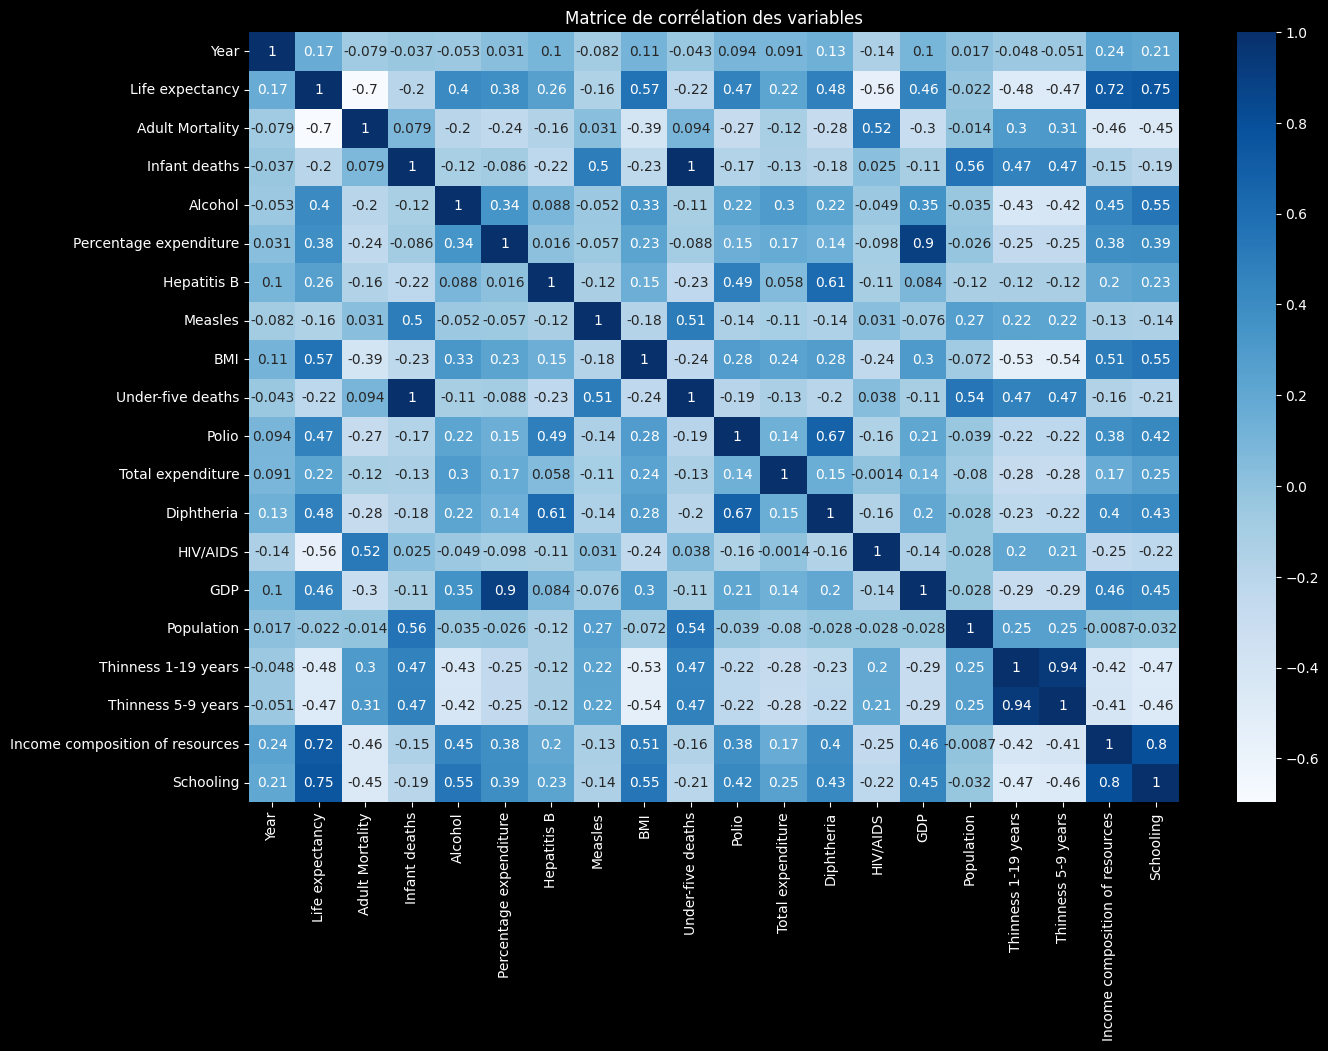

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="Blues")
plt.title("Matrice de corrélation des variables")
plt.show()

Cette matrice offre des insights intéressants. En premier lieu, il est à noter que les décès d'enfants de moins de cinq ans et les décès infantiles affichent une corrélation parfaite de 1, indiquant une dépendance mutuelle logique, étant donné que les décès infantiles incluent ceux des enfants de moins de cinq ans.

De plus, une corrélation significative se dégage entre les dépenses en pourcentage du PIB, le PIB lui-même, la composition des ressources du revenu, la scolarisation, et l'espérance de vie. Ces constats suggèrent que l'espérance de vie est fortement influencée par la durée de la scolarité et la composition des ressources de chaque foyer. Il est également plausible que le niveau d'éducation soit étroitement lié à la manière dont les ressources sont réparties au sein des foyers.

In [14]:
filtered_data_developing = data[data['Status'] == 'Developing']
filtered_data_developed = data[data['Status'] == 'Developed']

avg_life_expectancy_developing = filtered_data_developing.groupby('Year')['Life expectancy'].mean().reset_index()
avg_life_expectancy_developed = filtered_data_developed.groupby('Year')['Life expectancy'].mean().reset_index()

combined_data = pd.concat([
    avg_life_expectancy_developing.assign(Status='En développement'),
    avg_life_expectancy_developed.assign(Status='Développé')
])

fig = px.line(combined_data, x='Year', y='Life expectancy', color='Status',
              title='Pays en développement vs Pays développé',
              template='plotly_dark')

fig.update_xaxes(title='Année')
fig.update_yaxes(title='Espérance de vie moyenne')

fig.show()

c:\Users\abder\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



On observe une disparité significative de l'espérance de vie entre les pays développés et en développement. Cette observation renforce la corrélation mentionnée précédemment entre les dépenses totales, le PIB et le niveau d'espérance de vie des nations.

In [16]:
avg_life_expectancy_by_country = data.groupby('Country')['Life expectancy'].mean()

lowest_countries = avg_life_expectancy_by_country.nsmallest(5).index
highest_countries = avg_life_expectancy_by_country.nlargest(5).index


filtered_data_lowest = avg_life_expectancy_by_country[lowest_countries].reset_index()
fig = px.pie(filtered_data_lowest, names='Country', values='Life expectancy',
             title='Top 5 des pays avec l’espérance de vie la plus basse',
             template='plotly_dark')
fig.update_traces(hoverinfo='label+percent', textinfo='value', 
                  hovertemplate="%{label}<br>Life expectancy: %{value}<extra></extra>")

fig.show()

filtered_data_highest= avg_life_expectancy_by_country[highest_countries].reset_index()
fig = px.pie(filtered_data_highest, names='Country', values='Life expectancy',
             title='Top 5 des pays avec l’espérance de vie la plus haute',
             template='plotly_dark')
fig.update_traces(hoverinfo='label+percent', textinfo='value', 
                  hovertemplate="%{label}<br>Life expectancy: %{value}<extra></extra>")

fig.show()

Dans ces graphiques, les cinq pays affichant les meilleures et les moins bonnes espérances de vie sont visibles.

In [27]:
lowest_country = avg_life_expectancy_by_country.nsmallest(1)
highest_country = avg_life_expectancy_by_country.nlargest(1)

filtered_data_lowest = lowest_country.reset_index()
filtered_data_highest = highest_country.reset_index()

filtered_data_lowest['Status'] = 'Espérance de vie la plus haute'
filtered_data_highest['Status'] = 'Espérance de vie la plus basse'

combined_data = pd.concat([filtered_data_highest, filtered_data_lowest])

fig = px.bar(combined_data, x='Country', y='Life expectancy', color='Status',
             title='Comparaison des pays avec l’espérance de vie la plus haute et la plus basse',
             template='plotly_dark')

fig.update_xaxes(title='Pays')
fig.update_yaxes(title='Espérance de vie moyenne')

fig.show()

c:\Users\abder\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Il est notable qu'il existe une différence remarquable de 36,425 ans entre l'espérance de vie la plus élevée et la plus basse. Cette disparité est significative.

In [18]:
clean_data = data.dropna(subset=['Life expectancy'])

fig = px.scatter(clean_data, y='Schooling', x='Life expectancy', 
                 template='plotly_dark', size='Life expectancy')
fig.update_layout(title='Corrélation espérance de vie / durée de scolarité')
fig.update_xaxes(title='Espérance de vie')
fig.update_yaxes(title='Nombre d\'année à l\'école')
fig.show()


In [19]:
clean_data = data.dropna(subset=['Life expectancy'])

fig = px.scatter(clean_data, y='Total expenditure', x='Life expectancy', 
                 template='plotly_dark', size='Life expectancy')
fig.update_layout(title='Corrélation espérance de vie / pourcentage de dépenses gouvernemental pour la santé')
fig.update_xaxes(title='Espérance de vie')
fig.update_yaxes(title='% de dépenses')
fig.show()

In [20]:
clean_data = data.dropna(subset=['Life expectancy'])

fig = px.scatter(clean_data, y='Population', x='Life expectancy', 
                 template='plotly_dark', size='Life expectancy')
fig.update_layout(title='Corrélation espérance de vie / population')
fig.update_xaxes(title='Espérance de vie')
fig.update_yaxes(title='Population')
fig.show()

In [21]:
clean_data = data.dropna(subset=['Life expectancy'])

fig = px.scatter(clean_data, y='HIV/AIDS', x='Life expectancy', 
                 template='plotly_dark', size='Life expectancy')
fig.update_layout(title='Corrélation espérance de vie / nombre de morts HIV/AIDS par 1000 habitants')
fig.update_xaxes(title='Espérance de vie')
fig.update_yaxes(title='Nombre de morts')
fig.show()

In [22]:
clean_data = data.dropna(subset=['Life expectancy'])

fig = px.scatter(clean_data, y='GDP', x='Life expectancy', 
                 template='plotly_dark', size='Life expectancy', title='')
fig.update_layout(title='Corrélation espérance de vie / GDP')
fig.update_xaxes(title='Espérance de vie')
fig.update_yaxes(title='GDP')

fig.show()


In [23]:
clean_data = data.dropna(subset=['Life expectancy'])

fig = px.scatter(clean_data, y='BMI', x='Life expectancy', 
                 template='plotly_dark', size='Life expectancy', title='')
fig.update_layout(title='Corrélation espérance de vie / IMC')
fig.update_xaxes(title='Espérance de vie')
fig.update_yaxes(title='IMC')

fig.show()


In [24]:
filtered_data = data[data['Country'] != 'India']
fig = px.scatter(filtered_data, x='GDP', y='Infant deaths', color='Country', hover_name='Country', log_x=True, size_max=60,  template='plotly_dark')
fig.update_layout(title='Relation entre le PIB, l\'espérance de vie et la mortalité infantile')
fig.update_xaxes(title='PIB')
fig.update_yaxes(title='Nombre de morts')
fig.show()


c:\Users\abder\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [25]:
fig = px.scatter(data, x='GDP', y='Adult Mortality', color='Country', hover_name='Country', log_x=True, size_max=60, template='plotly_dark')
fig.update_layout(title='Relation entre le PIB, l\'espérance de vie et la mortalité d\'adultes (15 à 60 ans)')
fig.update_xaxes(title='PIB')
fig.update_yaxes(title='Nombre de morts')
fig.show()

c:\Users\abder\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



c:\Users\abder\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.

c:\Users\abder\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



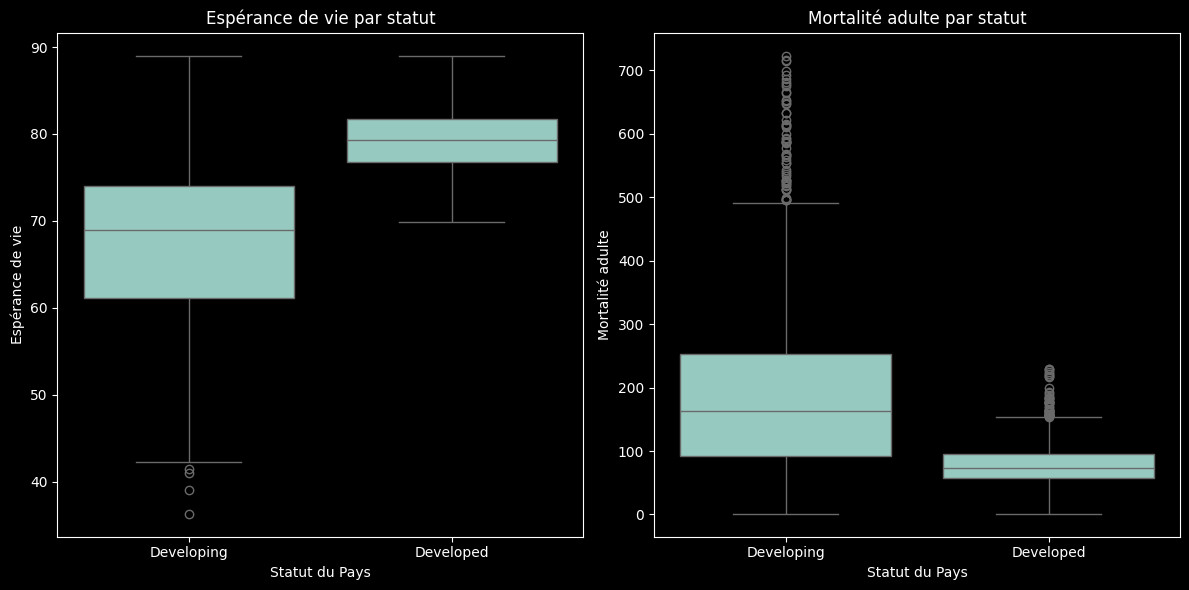

In [26]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Status', y='Life expectancy', data=data)
plt.title('Espérance de vie par statut')
plt.xlabel('Statut du Pays')  
plt.ylabel('Espérance de vie')

plt.subplot(1, 2, 2)
sns.boxplot(x='Status', y='Adult Mortality', data=data)
plt.title('Mortalité adulte par statut')
plt.xlabel('Statut du Pays')  
plt.ylabel('Mortalité adulte') 

plt.tight_layout()
plt.show()